<a href="https://colab.research.google.com/github/higordevellard/Machine_Learning_Advertisiment_Views/blob/main/machine_learning_advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use of Machine Learning for Advertisement Views 



## 1.Motivation

The goal of this project is to develop a machine learning model capable of predicting whether a person will click on a certain ad or not, based on available data about users of a widely known social network. Several algorithms will be tested to determine which will have the best accuracy.


## 2.Used Packages

In [1]:
# Configuration to not display warnings for the selected packages
import warnings
warnings.filterwarnings("ignore")

# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score


## 3.Dataset Load

The dataset chosen for this project is available at UCI Machine Learning, at the following address: https://archive.ics.uci.edu/ml/index.php.


In [2]:
# Dataset location
url_1 = 'https://raw.githubusercontent.com/higordevellard/Machine_Learning_Advertisiment_Views/main/advertising_dataset.csv'

# Dataset attribute labels
labels_atributos = ['Time_on_site', 'Age', 'Avg_regional_income', 'Time_online', 'Ad_title', 'City', 'Male', 'Country',\
                    'View_time', 'View_click']

# Read dataset
dataset = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')


### **3.1.Dataset Information**

* The dataset loaded is part of a survey carried out during a marketing campaign where it was recorded whether users of a globally accessed social network clicked or not on the ad that was being published.

* The Attributes presented in the dataset are:

**'Time_on_site'**: Time spent by the consumer on the social network in minutes.

**'Age'**: Consumer age.

**'Avg_regional_income'**: Average income referring to geographic region.

**'Time_online'**: Average time spent on the internet in minutes.

**'Ad_title'**: Advertisement title.

**'City'**: Consumer City.

**'Male'**: Is the consumer male?

**'Country'**: Consumer country.

**'View_time'**: Record of the exact time when the consumer clicked on the ad or closed the window.

**'View_click'**: 0 or 1, indicating the click on the advertisement.







## 4. Exploratory Data Analysis

###4.1.Analysis and Data Processing

In [3]:
# Shows the dimensions of the dataset (rows and columns)
dataset.shape

(1000, 10)

In [4]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_on_site         1000 non-null   float64
 1   Age                  1000 non-null   int64  
 2   Avg_regional_income  1000 non-null   float64
 3   Time_online          1000 non-null   float64
 4   Ad_title             1000 non-null   object 
 5   City                 1000 non-null   object 
 6   Male                 1000 non-null   int64  
 7   Country              1000 non-null   object 
 8   View_time            1000 non-null   object 
 9   View_click           1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Important notes raised following the results of the .info() function:**

1)All 10 attributes were properly loaded.

2) All 1000 Instances (lines) are non-null (No missings).



In [5]:
# Transform categorical data into numeric.
label_encoder = LabelEncoder()
click_encoded = label_encoder.fit_transform(dataset['View_click'])

In [6]:
# Check for duplicate rows in the dataset.
print(dataset.duplicated().sum())

0


In [7]:
# Display the first 10 rows of the dataset
dataset.head(10)

,Time_on_site,Age,Avg_regional_income,Time_online,Ad_title,City,Male,Country,View_time,View_click
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [8]:
# Extract only the time from the "Record_time" column
dataset['View_time'] = pd.to_datetime(dataset['View_time']).dt.strftime("%H")

In [9]:
# Convert instances of 'View_time' attribute to integer
dataset['View_time'] = dataset['View_time'].astype(int)

### **4.2.Estatísticas Descritivas**

In [10]:
# Resumo estatístico do dataset.
dataset.drop(['Male', 'View_click'], axis=1).describe().round(2)


,Time_on_site,Age,Avg_regional_income,Time_online,View_time
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,65.00,36.01,55000.00,180.00,11.66
std,15.85,8.79,13414.63,43.90,6.96
min,32.60,19.00,13996.50,104.78,0.00
25%,51.36,29.00,47031.80,138.83,6.00
50%,68.22,35.00,57012.30,183.13,12.00
75%,78.55,42.00,65470.63,218.79,18.00
max,91.43,61.00,79484.80,269.96,23.00


Considering the 1000 records analyzed, the values ​​of (mean, standard deviation, minimum, maximum and quartiles) are presented.

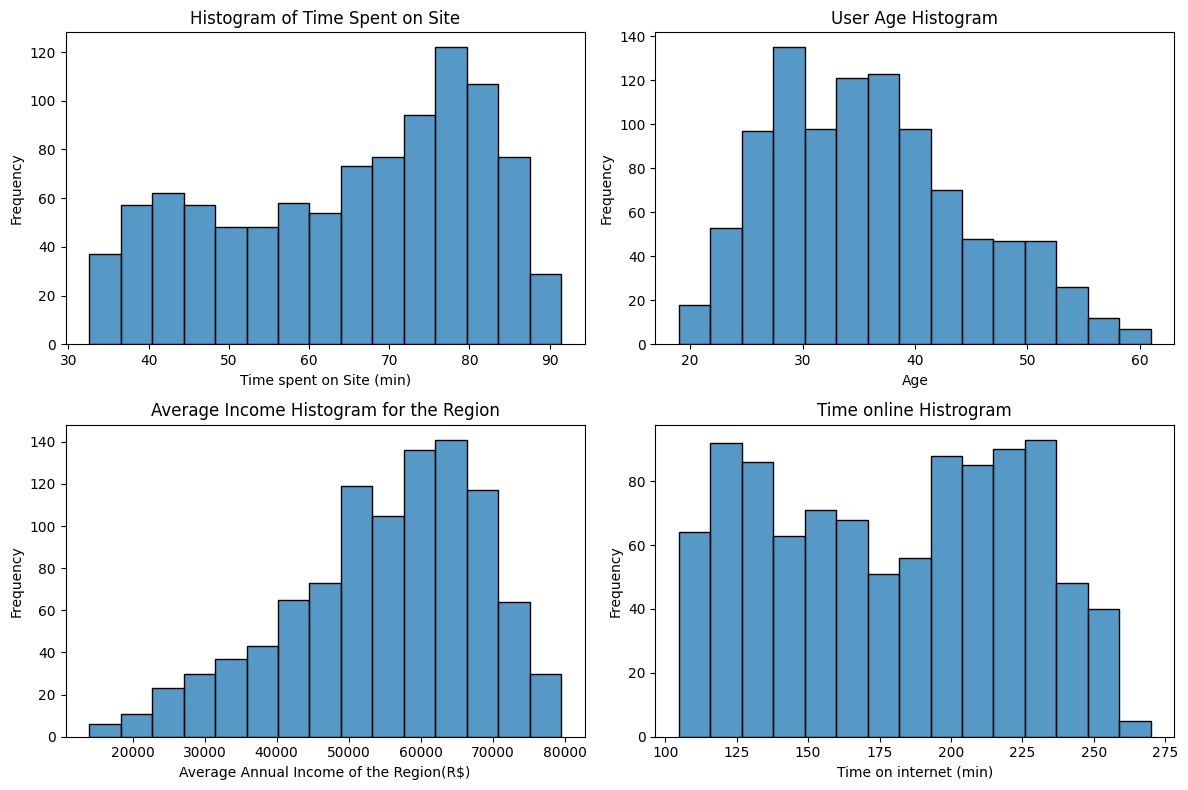

In [11]:
# Create a subplot with two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the histogram of Time_on_site
sns.histplot(dataset['Time_on_site'], kde=False, bins=15, ax=axs[0, 0])
axs[0, 0].set_xlabel("Time spent on Site (min)")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("Histogram of Time Spent on Site")

# Plot the Age histogram
sns.histplot(dataset['Age'], kde=False, bins=15, ax=axs[0, 1])
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("User Age Histogram")

# Plot the histogram of Income_me_region
sns.histplot(dataset['Avg_regional_income'], kde=False, bins=15, ax=axs[1, 0])
axs[1, 0].set_xlabel("Average Annual Income of the Region(R$)")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].set_title("Average Income Histogram for the Region")

# Plot the Online_Time histogram
sns.histplot(dataset['Time_online'], kde=False, bins=15, ax=axs[1, 1])
axs[1, 1].set_xlabel("Time on internet (min)")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("Time online Histrogram")

# Layout tweak
plt.tight_layout()

# Display of histograms
plt.show()

From the histogram presented, it can be seen that the average time spent on the site by users is about 80 min per day. The average age is around 30 years. Average geographic income around R$65,000.00 and average time spent on the internet per day, around 230 min.

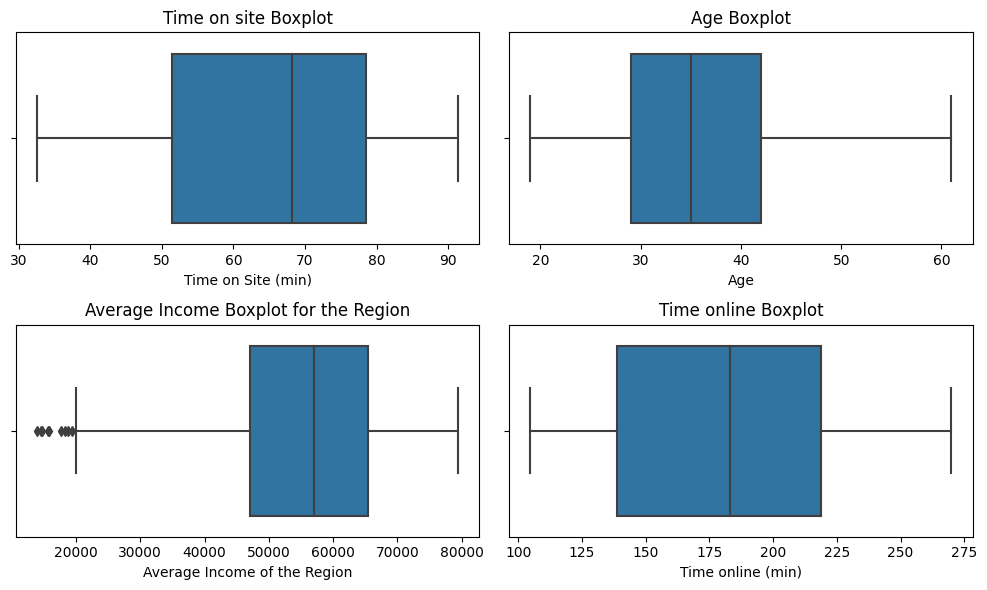

In [12]:
# Create a subplot with two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot the Time_on_site boxplot
sns.boxplot(x='Time_on_site', data=dataset, ax=axs[0, 0])
axs[0, 0].set_title("Time on site Boxplot")
axs[0, 0].set_xlabel("Time on Site (min)")

# Plot the Age boxplot
sns.boxplot(x="Age", data=dataset, ax=axs[0, 1])
axs[0, 1].set_title("Age Boxplot")
axs[0, 1].set_xlabel("Age")

# Plot the Income_avg_region boxplot
sns.boxplot(x='Avg_regional_income', data=dataset, ax=axs[1, 0])
axs[1, 0].set_title("Average Income Boxplot for the Region")
axs[1, 0].set_xlabel("Average Income of the Region")

# Plot the time_online boxplot
sns.boxplot(x='Time_online', data=dataset, ax=axs[1, 1])
axs[1, 1].set_title("Time online Boxplot")
axs[1, 1].set_xlabel("Time online (min)")

# Layout tweak
plt.tight_layout()

# Display of boxplots
plt.show()

The Boxplot presented indicates outliers only for the average income of the region, but they are only records that were computed in geographic regions where the income of the population is considered low. Usually associated with underdeveloped countries.




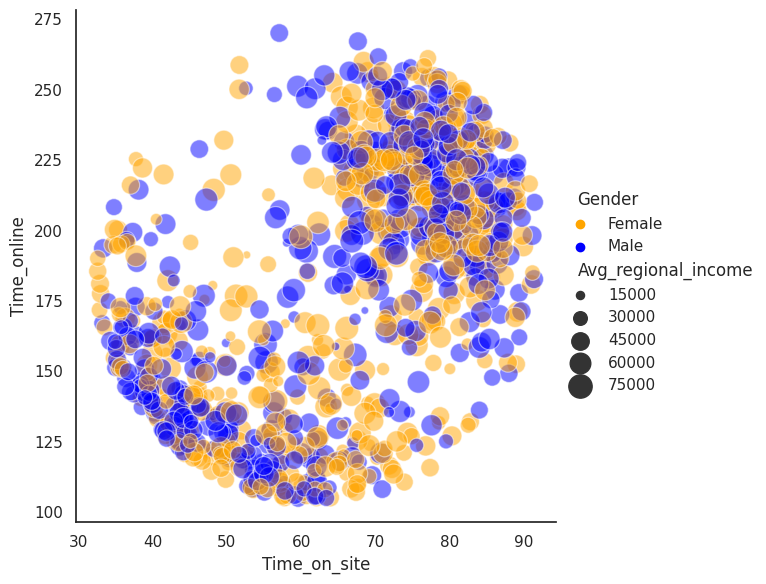

In [13]:
# Map the values ​​"1" to "Male" and "0" to "Female"
dataset["Gender"] = dataset["Male"].map({1: "Male", 0: "Female"})

# Configure seaborn theme
sns.set_theme(style="white")

# Define a custom color dictionary
cores_personalizadas = {"Female": "orange", "Male": "blue"}

# Plot the chart with custom colors
sns.relplot(x='Time_on_site', y='Time_online', hue="Gender", size='Avg_regional_income',
            sizes=(30, 300), alpha=.5, palette=cores_personalizadas,
            height=6, data=dataset)

# Display the chart
plt.show()



In the graph presented, we can see that there is a concentration of people who spend between 100 and 175 minutes a day on the internet and spend 40 to 70 minutes on the analyzed social network. We also have a second group of people who spend between 175 and 250 minutes a day on the internet and 70 to 90 minutes on the social network where the ad was published.
The number of men and women appears to be well balanced.

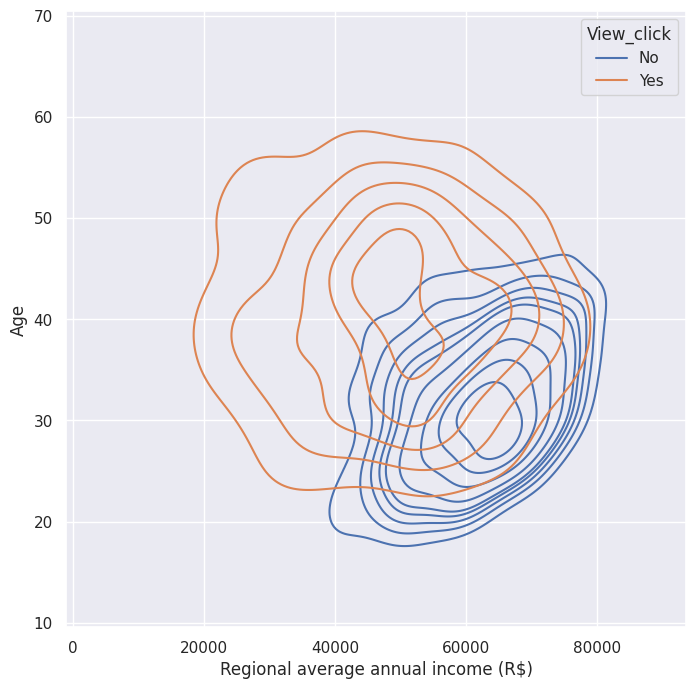

In [14]:
# Map the values ​​"1" to "Yes" and "0" to "No"
dataset['View_click'] = dataset['View_click'].map({1: "Yes", 0: "No"})

# Configure seaborn theme
sns.set_theme(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=dataset,
    x='Avg_regional_income',
    y="Age",
    hue='View_click',
    thresh=.1,
    ax=ax
)

plt.xlabel("Regional average annual income (R$)")

plt.show()

The graph shown shows that for more advanced ages and with annual income around 50 thousand, the female public tends to click more on the ad, but for ages around 20 years old and income around 60 thousand, men tend to click more. 

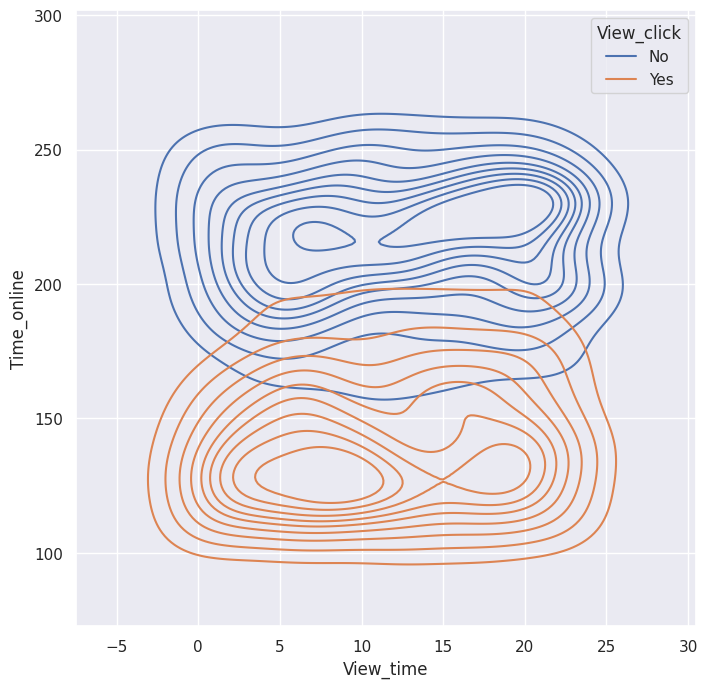

In [15]:
# Configure seaborn theme
sns.set_theme(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=dataset,
    x='View_time',
    y='Time_online',
    hue='View_click',
    thresh=.1,
    ax=ax
)

plt.show()

In the graph above, it is evident that there is a density of people between 5 and 10 am who viewed the ad and spend about 30 to 40 minutes a day on the social network.

## **5.Modeling and Inference**

### **5.1. Separation into training set and test set with holdout**

In [16]:
test_size = 0.20 # test set size
seed = 7 # random seed

# Separation into training and test sets
array = dataset.values
X = array[:, np.r_[0:4, 6, 8]] 
y = click_encoded.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout

# Cross-validation parameters and partitions
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) 

In [17]:
# Checking that training data is being pulled from the right column.
print("Training data:")
print(X_train)  
print(y_train) 

Training data:
[[57.51 38 47682.28 105.71 0 8]
 [55.79 24 59550.05 149.67 0 20]
 [72.8 35 63551.67 249.54 0 23]
 ...
 [67.28 43 76246.96 155.8 1 21]
 [46.89 48 72553.94 176.78 1 13]
 [44.33 41 43386.07 120.63 0 9]]
[1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 

### **5.2.Creation and evaluation of models: baseline**

Considering that we are dealing with a classification problem, the main classification algorithms will be used, namely: KNN, Classification Tree, Naive Bayes and SVN. Ensemble methods will also be used to combine several IM models in a single model, such as: Voting, Bagging and Boosting. The original data will be used, that is, without transformations.

LR: 0.902500 (0.034821)
KNN: 0.698750 (0.044176)
CART: 0.946250 (0.020194)
NB: 0.965000 (0.015612)
SVM: 0.703750 (0.047779)
Bagging: 0.961250 (0.016250)
RF: 0.963750 (0.018916)
ET: 0.965000 (0.020000)
Ada: 0.955000 (0.021065)
GB: 0.957500 (0.023184)
Voting: 0.933750 (0.034483)


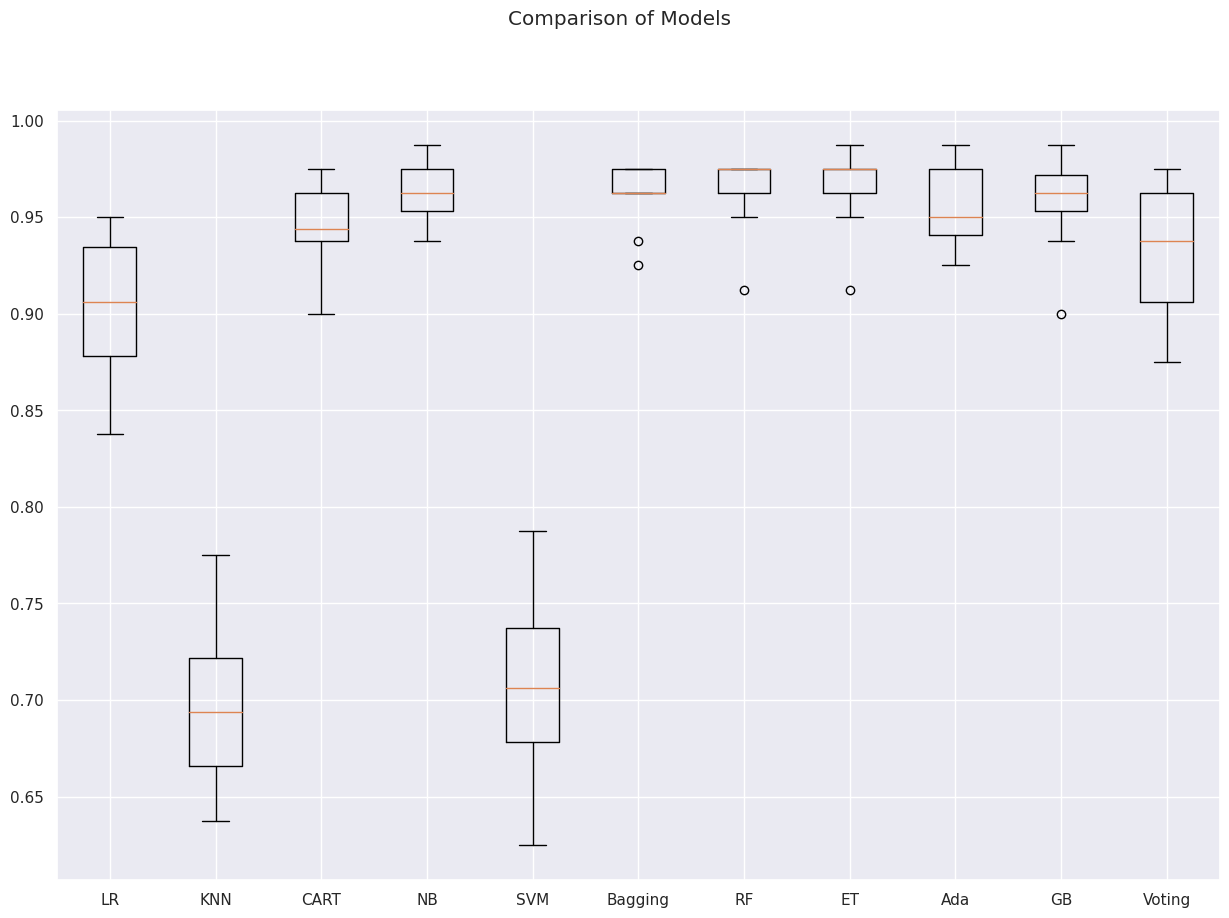

In [18]:
np.random.seed(7) # defining a global seed to ensure model reproducibility

# List that will store the models
models = []

# Creating the templates and adding them to the template list
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Defining the base classifier parameters for the BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating the models for the VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating the ensembles and adding them to the template list
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store the results
results = []
names = []

# Evaluation of the models
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Model comparison boxplot
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparison of Models') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

After viewing each model using the boxplot, the ones that showed the best accuracy were "NB" and "Random Forest". The KNN and SVM algorithms showed low accuracy compared to the other models. A possible disadvantage of using the KNN algorithm and the SVM is their sensitivity to dimensionality which may have affected the accuracy.

### **5.3.Creation and evaluation of models: standardized and normalized data**


Considering that some models may present better results when the data are standardized or normalized, a comparison will be made to assess whether any algorithm will overcome the accuracy achieved so far.

LR-orig: 0.903 (0.035)
KNN-orig: 0.699 (0.044)
CART-orig: 0.946 (0.020)
NB-orig: 0.965 (0.016)
SVM-orig: 0.704 (0.048)
Bag-orig: 0.961 (0.016)
RF-orig: 0.964 (0.019)
ET-orig: 0.965 (0.020)
Ada-orig: 0.955 (0.021)
GB-orig: 0.957 (0.023)
Vot-orig: 0.934 (0.034)
LR-padr: 0.970 (0.015)
KNN-padr: 0.959 (0.024)
CART-padr: 0.945 (0.025)
NB-padr: 0.966 (0.014)
SVM-padr: 0.964 (0.019)
Bag-padr: 0.958 (0.026)
RF-padr: 0.962 (0.016)
ET-padr: 0.963 (0.024)
Ada-padr: 0.955 (0.021)
GB-padr: 0.959 (0.022)
Vot-padr: 0.970 (0.015)
LR-norm: 0.965 (0.022)
KNN-norm: 0.958 (0.023)
CART-norm: 0.949 (0.025)
NB-norm: 0.966 (0.014)
SVM-norm: 0.961 (0.017)
Bag-norm: 0.959 (0.019)
RF-norm: 0.964 (0.017)
ET-norm: 0.960 (0.024)
Ada-norm: 0.955 (0.021)
GB-norm: 0.957 (0.023)
Vot-norm: 0.961 (0.020)


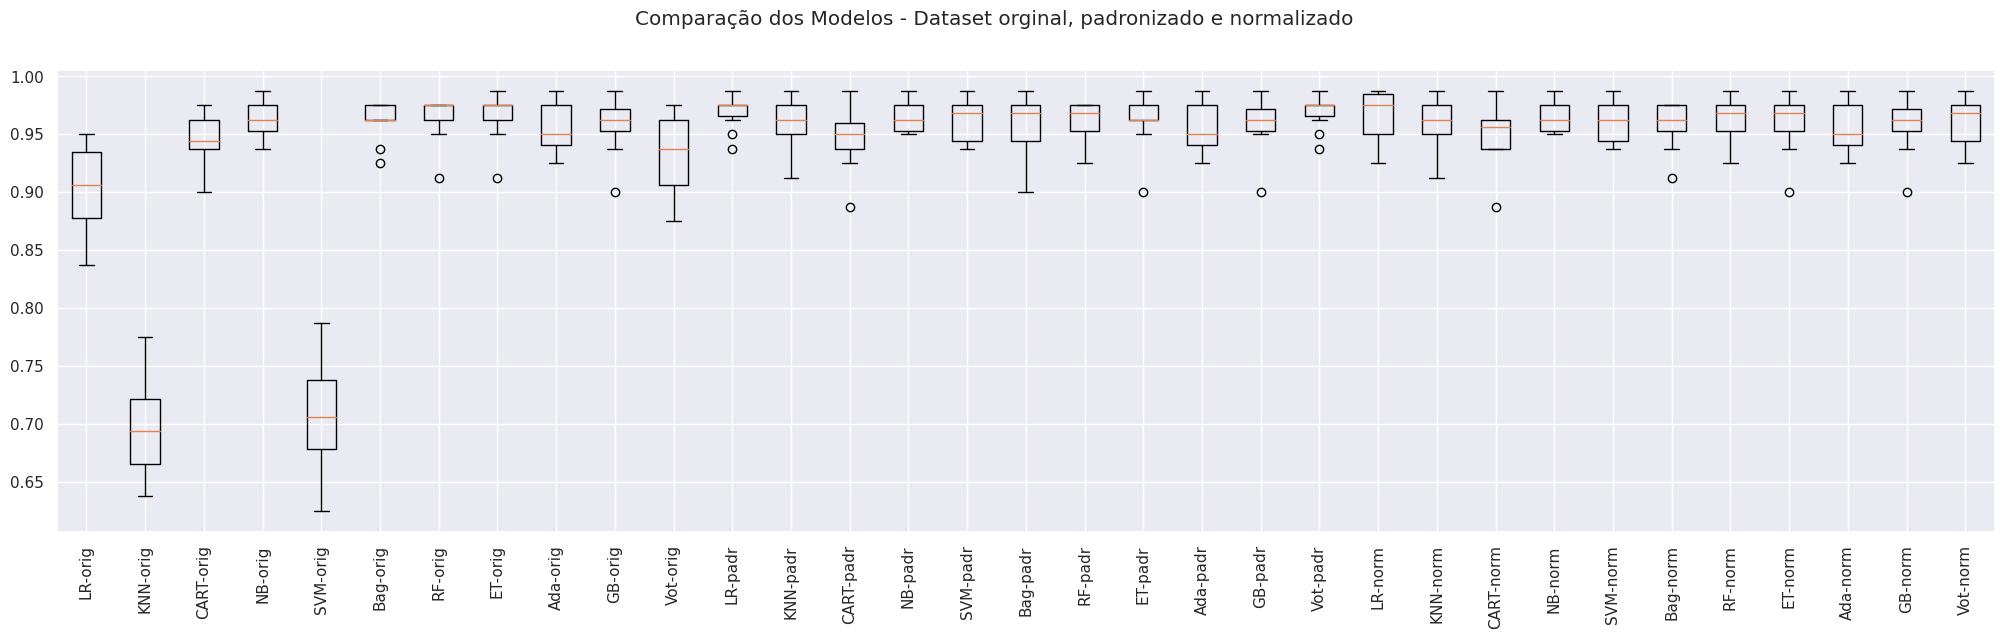

In [19]:
np.random.seed(7) 

pipelines = []
results = []
names = []


reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformations that will be used
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Assembling the pipelines

# original dataset
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Standardized dataset
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalized dataset
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Running the pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Model comparison boxplot
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

As expected, after performing the standardization and normalization of the data.
a new algorithm showed better accuracy, with logistic regression with standardized data reaching 0.97 accuracy. A very interesting observation is the KNN algorithm that presented low accuracy with the original data and when performing the transformations, it started to have high accuracy.

### **5.4.Optimization of hyperparameters**



Como exemplo, será utilizado a otimização dos hiperparâmetros do algoritmo KNN.

In [20]:
# Tuning of KNN

np.random.seed(7)

pipelines = []

# Defining pipeline components
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepare and run the GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("No missing data handling: %s - Better: %f using %s" % (name, grid.best_score_, grid.best_params_))

No missing data handling: knn-orig - Better: 0.813750 using {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
No missing data handling: knn-padr - Better: 0.966250 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}
No missing data handling: knn-norm - Better: 0.966250 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


### **5.5. Finalization of the Model**

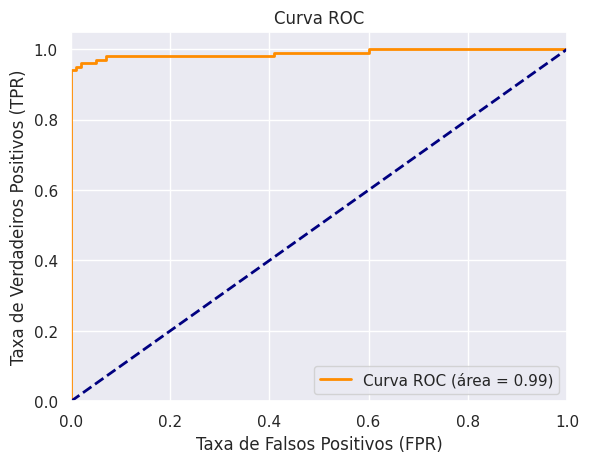

Acurácia: 0.97


In [21]:

# Preparing the model
scaler = StandardScaler().fit(X_train) # adjust the scaler with the training set
rescaledX = scaler.transform(X_train) # apply patterning to the training set
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimate of predicted probability
rescaledTestX = scaler.transform(X_test) # apply patterning to the test set
y_scores = model.predict_proba(rescaledTestX)[:, 1]

# Calculation of the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Accuracy evaluation
predictions = model.predict(rescaledTestX)
accuracy = accuracy_score(y_test, predictions)
print('Acurácia:', accuracy)

The ROC curve is an important tool to evaluate the performance of a binary classification model, graphically showing the true positive rate (sensitivity) / false positive rate (1 - Specificity). The performance shown by the model is presented by the area under the ROC curve (AUC), and as seen in the graph the AUC VALUE is 0.99.

In [22]:
# Model preparation with ALL dataset
scaler = StandardScaler().fit(X) # scaler adjustment with ALL dataset
rescaledX = scaler.transform(X) # apply standardization to the WHOLE dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## **6.Simulating model application on unseen data**

In [23]:
# New data - we don't know the class!
data = {'Time_on_site':  [65.98, 82.00, 90.22],
        'Age': [48, 24, 45],
        'Avg_regional_income': [24600.00, 53000, 60000],
        'Time_online': [130.00, 145.00, 180.00], 
        'Male': [0, 0, 1],
        'View_time': [15, 10, 22],
        }

atributos = ['Time_on_site', 'Age', 'Avg_regional_income', 'Time_online', 'Male', 'View_time']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:, np.r_[0:6]].astype(float)

# Standardization in the input data using the scaler used in X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 6.18338653e-02  1.36553582e+00 -2.26731579e+00 -1.13946363e+00
  -9.62695317e-01  4.80059506e-01]
 [ 1.07283460e+00 -1.36758566e+00 -1.49165518e-01 -7.97625223e-01
  -9.62695317e-01 -2.38592449e-01]
 [ 1.59158779e+00  1.02389563e+00  3.72913774e-01 -2.27892270e-06
   1.03875025e+00  1.48617224e+00]]


In [24]:
# Class prediction of input data
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 0]


From the output obtained considering the inclusion of 03 more instances, the algorithm predicted that the first one would click on the ad and the others would not.